<a href="https://colab.research.google.com/github/HaHuyHoang19146188/BAII-TAP-AI/blob/main/MONEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Chuyển đến file Google Drive chứa bộ ảnh đã tạo
%cd"/content/drive/MyDrive/MONEY"

/content/drive/MyDrive/MONEY


In [3]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/MONEY/TRAINGING',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 220 images belonging to 11 classes.


In [5]:
# Tạo bộ dữ liệu validation set
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/MONEY/VALIDATION',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 44 images belonging to 11 classes.


In [6]:
#các nhãn có trong bộ dữ liệu train
training_set.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [7]:
#các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=500,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/500
7/7 [==============================] - 30s 4s/step - loss: 0.1962 - accuracy: 0.9591 - val_loss: 0.3139 - val_accuracy: 0.9773
Epoch 2/500
7/7 [==============================] - 25s 3s/step - loss: 0.3845 - accuracy: 0.9227 - val_loss: 0.1120 - val_accuracy: 0.9545
Epoch 3/500
7/7 [==============================] - 24s 3s/step - loss: 0.1506 - accuracy: 0.9455 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 4/500
7/7 [==============================] - 25s 3s/step - loss: 0.1362 - accuracy: 0.9591 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 5/500
7/7 [==============================] - 24s 4s/step - loss: 0.1473 - accuracy: 0.9545 - val_loss: 0.0271 - val_accuracy: 0.9773
Epoch 6/500
7/7 [==============================] - 24s 4s/step - loss: 0.0434 - accuracy: 0.9818 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/500
7/7 [==============================] - 24s 3s/step - loss: 0.0916 - accuracy: 0.9636 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 8/500
7/7 [==========

In [11]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0031654085032641888
Train Accuracy 1.0


<function matplotlib.pyplot.show>

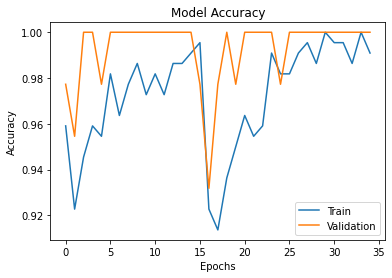

In [12]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

5000


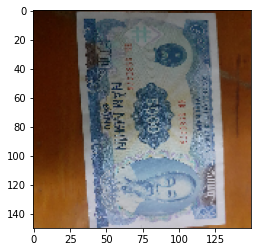

In [15]:
img=load_img('/content/drive/MyDrive/MONEY/TEST/465556d46097a0c9f986.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'  
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'  
elif round(result[0][10])==1:
  prediction='500000'  
print(prediction)

In [14]:
# Lưu lại
model.save("Food.h5")
# Tải mô hình 
model_CNN=load_model('Food.h5')

20000


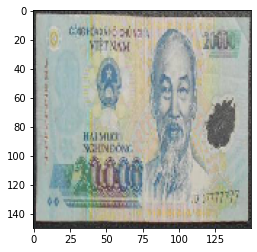

In [19]:
img=load_img('/content/drive/MyDrive/MONEY/TEST/vip13-20k-seri-jd-07777777.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
elif round(result[0][1])==1:
  prediction='10000'
elif round(result[0][2])==1:
  prediction='100000'
elif round(result[0][3])==1:
  prediction='200'  
elif round(result[0][4])==1:
  prediction='2000'
elif round(result[0][5])==1:
  prediction='20000'
elif round(result[0][6])==1:
  prediction='200000'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='5000'
elif round(result[0][9])==1:
  prediction='50000'  
elif round(result[0][10])==1:
  prediction='500000'  
print(prediction)